
Importing necessary libraries for data analysis and visualization.


In [8]:

import pandas as pd
import matplotlib.pyplot as plt



Loading the Chipotle dataset from the CSV file.


In [9]:

file_path = 'chipotle.csv' 
chipotle_data = pd.read_csv(file_path, delimiter='\t')
chipotle_data.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


Converting the parameter "item_price" from a string to a numerical format + handling missing values in the dataset


In [10]:

chipotle_data['item_price'] = chipotle_data['item_price'].str.replace('$', '').astype(float)



Calculating the total order count and total sales for each item.


In [11]:

sales_analysis = chipotle_data.groupby('item_name').agg(
    Total_Orders=pd.NamedAgg(column='quantity', aggfunc='sum'),
    Total_Sales=pd.NamedAgg(column='item_price', aggfunc='sum')
).reset_index().sort_values(by='Total_Sales', ascending=False)

sales_analysis.head()


,item_name,Total_Orders,Total_Sales
17,Chicken Bowl,761,7342.73
18,Chicken Burrito,591,5575.82
39,Steak Burrito,386,3851.43
38,Steak Bowl,221,2260.19
25,Chips and Guacamole,506,2201.04



Customer Preference Analysis: 
Analyzing of choices for the most popular items (Eg: toppings in the food).


In [12]:

popular_items = sales_analysis.head(5)['item_name']
chipotle_data[chipotle_data['item_name'].isin(popular_items)].groupby('item_name')['choice_description'].value_counts().head(10)


item_name     choice_description                                                               
Chicken Bowl  [Fresh Tomato Salsa, [Fajita Vegetables, Rice]]                                      17
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]    14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]               14
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                    13
              [Fresh Tomato Salsa, [Rice, Cheese, Lettuce]]                                        13
              [Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                            13
              [Tomatillo Green Chili Salsa, [Rice, Pinto Beans, Sour Cream, Lettuce]]              12
              [Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                        11
              [Fresh Tomato Salsa, [Fajita Vegetables, Rice, Lettuce]]                  

Finding the relationship between Item Price and the Quantity Ordered

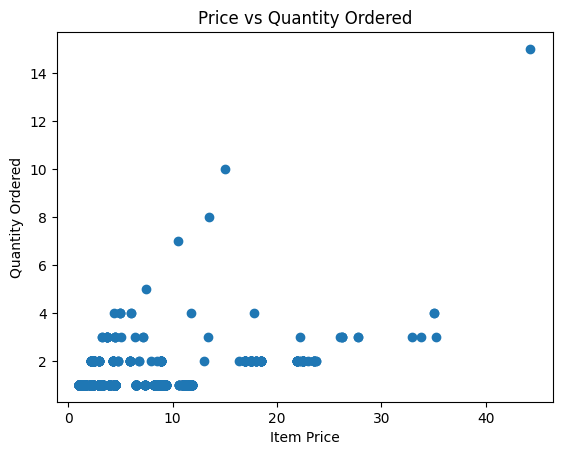

In [15]:

plt.scatter(chipotle_data['item_price'], chipotle_data['quantity'])
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Price vs Quantity Ordered')
plt.show()


Predict total quantity of items likely going to be ordered by a customer (based on item features + characteristics)


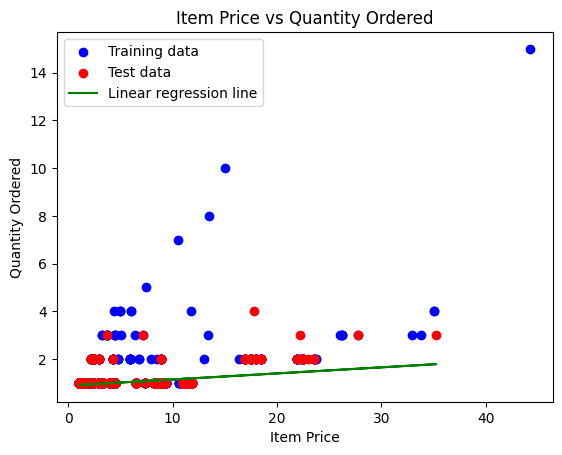

"\nThe scatter plot with the linear regression line, showing the relationship between item price and quantity ordered, provides several valuable insights for the company:\n\n1. **Understanding Customer Behavior**: The plot reveals how customers' order quantities vary with the price of items. For instance, if most orders cluster around lower-priced items, it might indicate price sensitivity among customers.\n\n2. **Pricing Strategy**: By observing the distribution of orders across different price points, the company can assess the effectiveness of its pricing strategy. If higher-priced items have significantly fewer orders, it might suggest the need for pricing adjustments or promotions.\n\n3. **Product Portfolio Management**: The visualization can help identify which price ranges are most popular among customers. This information can guide decisions on which items to promote more heavily or which new products to introduce.\n\n4. **Demand Forecasting**: Understanding the relationship be

In [16]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 'order_data'-> features and 'order_quantity' -> target
order_data = chipotle_data[['item_price']]
order_quantity = chipotle_data['quantity']

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(order_data, order_quantity)

X_train, X_test, y_train, y_test = train_test_split(order_data, order_quantity, test_size=0.2, random_state=42)

y_pred = lin_reg.predict(X_test)


plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Test data')
plt.plot(X_test, y_pred, color='green', label='Linear regression line')
plt.xlabel('Item Price')
plt.ylabel('Quantity Ordered')
plt.title('Item Price vs Quantity Ordered')
plt.legend()
plt.show()

"""
The scatter plot with the linear regression line, showing the relationship between item price and quantity ordered, provides several valuable insights for the company:

1. **Understanding Customer Behavior**: The plot reveals how customers' order quantities vary with the price of items. For instance, if most orders cluster around lower-priced items, it might indicate price sensitivity among customers.

2. **Pricing Strategy**: By observing the distribution of orders across different price points, the company can assess the effectiveness of its pricing strategy. If higher-priced items have significantly fewer orders, it might suggest the need for pricing adjustments or promotions.

3. **Product Portfolio Management**: The visualization can help identify which price ranges are most popular among customers. This information can guide decisions on which items to promote more heavily or which new products to introduce.

4. **Demand Forecasting**: Understanding the relationship between price and quantity can assist in predicting future demand for products, aiding in inventory management and supply chain optimization.

5. **Marketing and Promotions**: Insights from the plot can inform marketing strategies. For example, if certain price points are more popular, marketing efforts can be tailored to highlight items within these ranges.

6. **Revenue Optimization**: By analyzing how changes in prices impact order quantities, the company can make data-driven decisions to optimize revenue. For example, slight increases in prices may not significantly affect the quantity ordered, leading to higher revenue without losing customers.

7. **Model Limitations and Business Decisions**: The simplicity of the model and any visible discrepancies between the model's predictions and actual data points highlight the complexity of customer behavior. This recognition can drive further analysis and the development of more sophisticated models.

In summary, this analysis helps the company understand the dynamics of customer orders in relation to pricing, providing a foundation for informed decision-making in various business areas, including marketing, pricing strategy, product management, and supply chain operations.
"""